In [2]:
import requests
import json
from pprint import pprint
from config import api_key
import random
from citipy import citipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.DataFrame()
lat = []
lng = []
for x in range(0,1700): #get 700 random numbers
    lat.append(random.randint(-90,90)) #random number from range -90 to 90
    lng.append(random.randint(-180,180)) #random number from range -180 to 180
df["Lat"] = lat
df["Lng"] = lng
df["City Name"] = ''
df["Country"] = ''
df.head()
df.count()
   

Lat          1700
Lng          1700
City Name    1700
Country      1700
dtype: int64

In [4]:
for index,row in df.iterrows():
    city = citipy.nearest_city(row["Lat"],row["Lng"])
    if " " in city.city_name:
        city.city_name = city.city_name.replace(" ", "%20") 
    df.set_value(index,"City Name",city.city_name)
    df.set_value(index,"Country",city.country_code)
    df["Temp"]=''
df = df.drop_duplicates(["City Name","Country"])#drop the duplicate values
df["Humidity"]=''
df["Cloudiness"]=''
df["Wind Speed"]=''
df.head()
df.count()

Lat           666
Lng           666
City Name     666
Country       666
Temp          666
Humidity      666
Cloudiness    666
Wind Speed    666
dtype: int64

In [5]:
cities = df["City Name"].tolist()
settings = {"units":"imperial","appid":api_key}
responses=[]
query = ["main.temp"]
urls = []

for index,row in df.iterrows():
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q={row['City Name']},{row['Country']}"
    print(url)
    responses = requests.get(url).json()

    try:
        df.set_value(index,"Lat",responses["coord"]["lat"])
        df.set_value(index,"Lng",responses["coord"]["lon"])
        df.set_value(index,"Temp",responses["main"]["temp"])
        df.set_value(index,"Humidity",responses["main"]["humidity"])
        df.set_value(index,"Cloudiness",responses["clouds"]["all"])
        df.set_value(index,"Wind Speed",responses["wind"]["speed"])
        df.set_value(index, "City Name",responses["name"])
    except KeyError:
        df.set_value(index,"Temp",np.nan)


df.head()

        

    
  

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=toora-khem,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=bluff,nz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=vorchdorf,at
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=gold%20coast,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=ushuaia,ar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=port%20elizabeth,za
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=fort%20saint%20john,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=manokwari,id
http://api.openweathermap.org/data/2.5/weather?units=Impe

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=tawzar,tn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=saravan,la
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=kodiak,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=hilo,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=khatanga,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=neuquen,ar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=cherskiy,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=san%20cristobal,ec
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=kousseri,cm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=kedougou,sn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=saleaula,ws
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=cooma,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=chuy,uy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=geraldton,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=shitanjing,cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=husavik,is
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba25

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=mrirt,ma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=malwan,in
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=kruisfontein,za
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=souillac,mu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=ankara,tr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=deputatskiy,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=sitka,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=morehead,pg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=sonipat,in
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=nouadhibou,mr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=shirvan,ir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=mikhaylovka,kz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=havoysund,no
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=beloha,mg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=dalvik,is
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=ilulissat,gl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b8

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=beringovskiy,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=vieira%20de%20leiria,pt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=pemba,mz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=waipawa,nz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=umm%20lajj,sa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=pamanukan,id
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=dzilam%20gonzalez,mx
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=trapani,it
http://api.openweathermap.org/data/2.5/weather?units=Impe

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=srirampur,in
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=herat,af
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=inta,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=namatanai,pg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=georgetown,gy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=tiksi,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=vila,vu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=shkotovo-22,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=ferrol,es
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=falealupo,ws
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=sonari,in
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=mareeba,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=krasnoborsk,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=haukipudas,fi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=ortona,it
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=samarai,pg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=tooele,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=robertsport,lr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=sangar,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=porbandar,in
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=ucluelet,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=parras,mx
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=sistranda,no
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=buala,sb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=broken%20hill,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=yueyang,cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=mount%20isa,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=north%20battleford,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=gromiljak,ba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=san%20andres,co
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=uporovo,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5addd7633b888ba2559a6ca22e961000&q=alugan,ph
http://api.openweathermap.org/data/2.5/weather?units=Imperial

,Lat,Lng,City Name,Country,Temp,Humidity,Cloudiness,Wind Speed
0,52,96,Toora-Khem,ru,0.58,72,80,3.15
1,-46,168,Bluff,nz,56.02,100,88,15.12
2,48,13,Vorchdorf,at,30.2,86,20,6.93
3,-28,153,Gold Coast,au,71.6,94,90,5.82
4,-54,-68,Ushuaia,ar,47.51,97,80,18.92


In [6]:
df_pd = df.dropna(how='any')
df_pd.head()


,Lat,Lng,City Name,Country,Temp,Humidity,Cloudiness,Wind Speed
0,52,96,Toora-Khem,ru,0.58,72,80,3.15
1,-46,168,Bluff,nz,56.02,100,88,15.12
2,48,13,Vorchdorf,at,30.2,86,20,6.93
3,-28,153,Gold Coast,au,71.6,94,90,5.82
4,-54,-68,Ushuaia,ar,47.51,97,80,18.92


In [16]:
df_pd.count()
df_pd.to_csv("Output.csv",index = False)

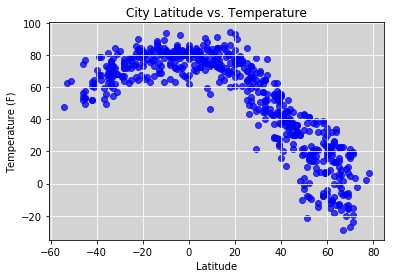

In [12]:
plt.scatter(df_pd["Lat"],df_pd["Temp"],color="blue",alpha = "0.75")
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True,color = "white")
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.show()

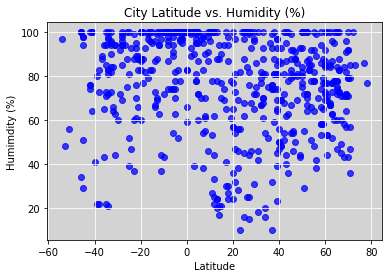

In [13]:
plt.scatter(df_pd["Lat"],df_pd["Humidity"],color="blue",alpha = "0.75")
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humimdity (%)")
plt.grid(True,color = "white")
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.show()

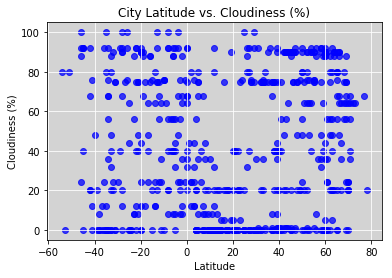

In [14]:
plt.scatter(df_pd["Lat"],df_pd["Cloudiness"],color="blue",alpha = "0.75")
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True,color = "white")
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.show()

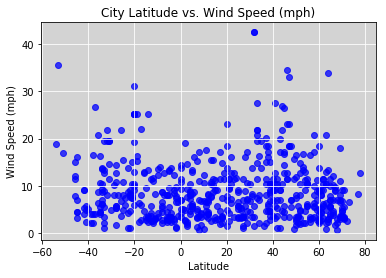

In [15]:
plt.scatter(df_pd["Lat"],df_pd["Wind Speed"],color="blue",alpha = "0.75")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True,color = "white")
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.show()